#### Introdução

A base de dados foi extraída do perfil de um usuário da rede social Letterboxd.

A rede social Letterboxd permite que o usuário registre e avalie os filmes que já viu, crie lista, escreva resenhas e adicone amigos.

Em resumo, a base de dados contém os registros dos filmes assistidos pelo usuário por data e a nota atribuída aos filmes.

#### Processamento de dados

In [141]:
# importando bibliotecas

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# lendo a base de dados

df_filmes = pd.read_csv("FilmesAssistidos.csv")

In [110]:
# verificando dados nulos e tipos dascolunas
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            542 non-null    object 
 1   Name            539 non-null    object 
 2   Year            536 non-null    float64
 3   Letterboxd URI  539 non-null    object 
 4   Rating          519 non-null    float64
 5   Rewatch         4 non-null      object 
 6   Tags            316 non-null    object 
 7   Watched Date    539 non-null    object 
dtypes: float64(2), object(6)
memory usage: 34.0+ KB


In [111]:
# criando a função de processamento dos dados
def processamento_df(df_filmes):
    
    # exibindo as 3 primeiras linhas do df
    df_head = df_filmes.head(3)

    # selecionando aleatoriamente 50 linhas do df
    df_amostra = df_filmes.sample(50)
    
    # removendo colunas com muitos dados nulos
    df_drop_colunas = df_filmes.drop(columns=['Rewatch', 'Tags'], inplace=True)
    
    # ordenando por idade menor para o maior
    df_sort = df_filmes.sort_values('Year')
      
    # removendo dados duplicados
    df_drop_duplicados = df_filmes.drop_duplicates(inplace=True)
    
    # reset index
    df_reset_index = df_filmes.reset_index()
    
    # lista de colunas
    colunas = list(df_filmes.columns) 
    
    # metricas: analise descritiva
    metricas = df_filmes.describe(include='all').T
    
    return df_head, df_amostra, df_drop_colunas, df_sort, df_drop_duplicados, df_reset_index, colunas, metricas

In [112]:
# chamando a função processamento usando os dados do df
df_head, df_amostra, df_drop_colunas, df_sort, df_drop_duplicados, df_reset_index, colunas, metricas = processamento_df(df_filmes)

In [113]:
df_head

,Date,Name,Year,Letterboxd URI,Rating,Rewatch,Tags,Watched Date
0,2020-05-02,Elena,2012.0,https://boxd.it/17uy3p,3.5,NaN,off,2015-07-12
1,2020-05-02,Elena,2012.0,https://boxd.it/17uy3p,3.5,NaN,off,2015-07-12
2,2020-05-02,The Starfish,1928.0,https://boxd.it/17uZhj,5.0,NaN,off,2016-10-12


In [114]:
df_amostra

,Date,Name,Year,Letterboxd URI,Rating,Rewatch,Tags,Watched Date
396,2021-03-26,Night Mode,2021.0,https://boxd.it/1KqlhL,1.0,NaN,panoramacoisadecinema,2021-03-02
251,2020-08-26,It Will Get Better,2020.0,https://boxd.it/1jVF2v,4.0,NaN,NaN,2020-08-25
223,2020-08-26,המכנסיים של פושקין,2019.0,https://boxd.it/1jSu9f,2.5,NaN,NaN,2020-08-20
531,2023-07-02,Talk to Her,2002.0,https://boxd.it/4sfFpP,3.5,NaN,netflix,2023-06-30
207,2020-07-31,Connection,1981.0,https://boxd.it/1hcwpn,NaN,NaN,NaN,2020-07-29
497,2021-10-12,Maid,2021.0,https://boxd.it/2crf59,4.0,NaN,netflix,2021-10-07
263,2020-09-09,I'm Thinking of Ending Things,2020.0,https://boxd.it/1lpxhL,0.5,NaN,netflix,2020-09-08
78,2020-05-11,Diane Has the Right Shape,2017.0,https://boxd.it/18ELC7,4.0,NaN,NaN,2020-05-10
394,2021-03-03,Sing Along,2020.0,https://boxd.it/1HkQ1F,3.0,NaN,panoramacoisadecinema,2021-03-02
262,2020-09-06,Basic Instinct,1992.0,https://boxd.it/1l6ZTl,0.5,NaN,netflix,2020-09-05


In [115]:
df_drop_colunas

In [116]:
df_sort

,Date,Name,Year,Letterboxd URI,Rating,Watched Date
2,2020-05-02,The Starfish,1928.0,https://boxd.it/17uZhj,5.0,2016-10-12
33,2020-05-02,Rome Open City,1945.0,https://boxd.it/17w56X,3.0,2020-04-14
43,2020-05-02,Casque d'Or,1952.0,https://boxd.it/17w6Pp,4.0,2020-04-25
131,2020-06-02,Tokyo Story,1953.0,https://boxd.it/1b7MNr,3.0,2020-06-01
74,2020-05-09,Street of Shame,1956.0,https://boxd.it/18nyox,3.0,2020-05-08
...,...,...,...,...,...,...
215,"2020-08-04,""Paris, Texas"",1984,https://boxd.it...",NaN,NaN,NaN,NaN,NaN
232,2020-08-26,Difícil é Não Brincar,NaN,https://boxd.it/1jVUnN,2.5,2020-08-21
245,2020-08-26,Clear Valley Report,NaN,https://boxd.it/1jU9EF,2.0,2020-08-24
323,"2021-01-26,""Adelaide, Aqui Não Há Segunda Vez ...",NaN,NaN,NaN,NaN,NaN


In [117]:
df_drop_duplicados

In [118]:
df_reset_index

,index,Date,Name,Year,Letterboxd URI,Rating,Watched Date
0,0,2020-05-02,Elena,2012.0,https://boxd.it/17uy3p,3.5,2015-07-12
1,2,2020-05-02,The Starfish,1928.0,https://boxd.it/17uZhj,5.0,2016-10-12
2,3,2020-05-02,The Broken Circle Breakdown,2012.0,https://boxd.it/17uZV9,4.0,2017-04-20
3,4,2020-05-02,I Travel Because I Have to I Come Back Because...,2009.0,https://boxd.it/17v0Et,4.0,2017-08-31
4,5,2020-05-02,Frances Ha,2012.0,https://boxd.it/17v13X,4.5,2017-11-04
...,...,...,...,...,...,...,...
536,537,2023-08-22,Everything Everywhere All at Once,2022.0,https://boxd.it/4JyVrX,4.0,2023-08-20
537,538,2023-10-17,Sing,2016.0,https://boxd.it/50E1iF,NaN,2023-09-09
538,539,2023-10-17,Sing 2,2021.0,https://boxd.it/50E1Z5,NaN,2023-09-10
539,540,2023-10-17,Little Fires Everywhere,2020.0,https://boxd.it/50E2YR,3.5,2023-09-17


In [119]:
colunas

['Date', 'Name', 'Year', 'Letterboxd URI', 'Rating', 'Watched Date']

In [120]:
metricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,541,206,2020-05-02,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,538,535,Brasil Impossível,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,535.0,NaN,NaN,NaN,2012.28785,14.237924,1928.0,2012.0,2018.0,2020.0,2023.0
Letterboxd URI,538,538,https://boxd.it/17uy3p,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,518.0,NaN,NaN,NaN,2.53861,1.244895,0.5,1.5,2.5,3.5,5.0
Watched Date,538,275,2020-07-28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# salvando um novo arquivo csv contendo os tratamentos realizados
df_filmes.to_csv("dados_processados.csv")

In [122]:
# lendo o novo arquivo csv criado
df = pd.read_csv('dados_processados.csv')

### **Insights**

- O filme "Brasil Impossível" foi assistido duas vezes;
- O filme assistido mais antigo é do ano 1928 e o mais recente de 2023;
- A menor nota atribuída é 0.5;
- O usuário assistiu a 10 filmes no dia 26/07/2020.

### **Gráficos**

##### Quantidade de filmes assistidos por ano

In [155]:
# criando um df com a contagem de filmes por ano
contagem_filmes_ano = df['Year'].value_counts()
contagem_filmes_ano

Year
2019.0    110
2020.0    108
2018.0     45
2021.0     35
2017.0     33
         ... 
1958.0      1
1952.0      1
1945.0      1
1980.0      1
1984.0      1
Name: count, Length: 63, dtype: int64

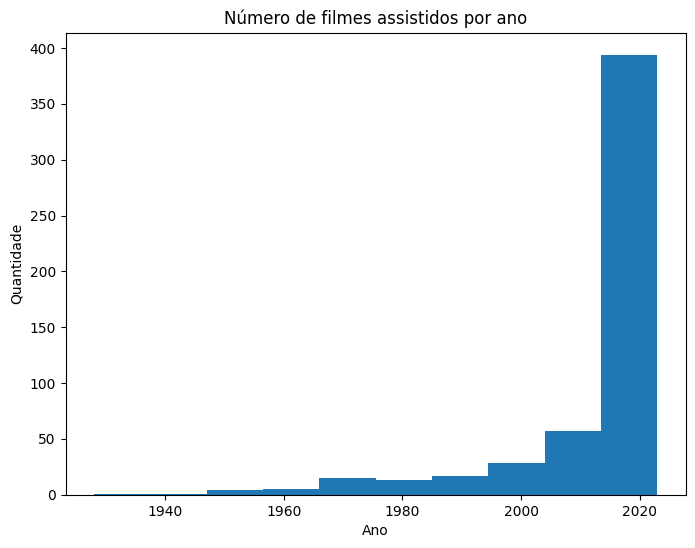

In [215]:
# plotando um gráfico tipo histograma com a quantidade de filmes por ano

plt.figure(figsize=(8, 6))

df['Year'].plot.hist();

plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Número de filmes assistidos por ano')

plt.show()

##### Quantidade de filmes por nota

In [212]:
# convertendo a coluna de object para float

df['Rating'] = df['Rating'].astype(float)

In [219]:
# criando um df com a quantidade de filmes por nota e ordenano

contagem_filmes_nota = df['Rating'].value_counts()
contagem_filmes_nota = contagem_filmes_nota.sort_values()
contagem_filmes_nota


Rating
4.5    18
5.0    19
1.5    34
3.5    37
0.5    53
1.0    54
2.5    60
4.0    73
2.0    74
3.0    96
Name: count, dtype: int64

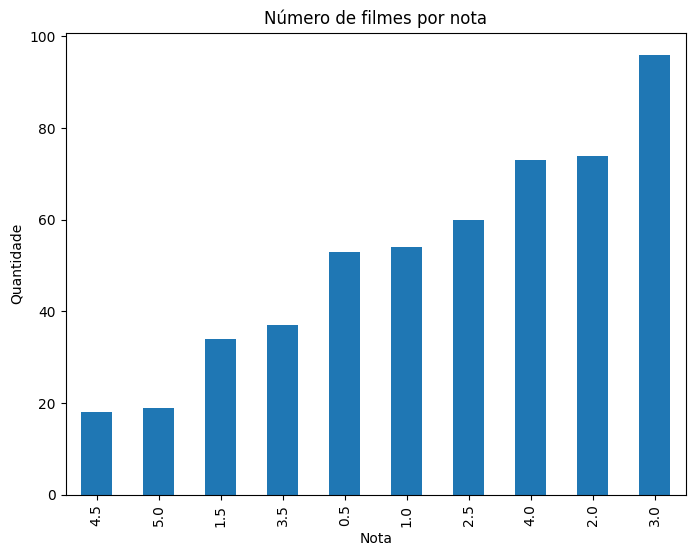

In [221]:
plt.figure(figsize=(8, 6))

contagem_filmes_nota.plot.bar()

plt.title('Número de filmes por nota')
plt.xlabel('Nota')
plt.ylabel('Quantidade')

plt.show()

##### Lista de filmes com nota 5

In [241]:
filmes_nota_5 = df.query("Rating == 5")
filmes_nota_5

,Unnamed: 0,Date,Name,Year,Letterboxd URI,Rating,Watched Date
1,2,2020-05-02,The Starfish,1928.0,https://boxd.it/17uZhj,5.0,2016-10-12
8,9,2020-05-02,Talking Heads,1980.0,https://boxd.it/17v3RF,5.0,2018-10-10
9,10,2020-05-02,Rat Fever,2012.0,https://boxd.it/17v4rX,5.0,2019-01-18
10,11,2020-05-02,Brasil Impossível,2018.0,https://boxd.it/17v7H5,5.0,2019-01-30
15,16,2020-05-02,The Handmaiden,2016.0,https://boxd.it/17v93h,5.0,2019-04-21
20,21,2020-05-02,Happy Together,1997.0,https://boxd.it/17viJ7,5.0,2020-03-15
114,115,2020-05-20,Fartura,2019.0,https://boxd.it/19FE4t,5.0,2020-05-19
150,151,2020-06-23,Kbela,2015.0,https://boxd.it/1dhoe1,5.0,2020-06-22
155,156,2020-06-29,Guaxuma,2018.0,https://boxd.it/1dR3PH,5.0,2020-06-28
158,159,2020-06-29,The Day Dorival Faced the Guards,1986.0,https://boxd.it/1dTKYh,5.0,2020-06-28
